In [ ]:
import numpy as np
from functools import reduce, partial
from mpmath import mp
from mpmath import pi as Pi
from mpmath import sin as Sin
from mpmath import asin as Asin
from mpmath import sqrt as Sqrt
from multiprocessing import Pool

import datetime


dyadicMap = lambda x : (2 * x) % 1

# --------------------------------------
tau = 12
# --------------------------------------


# --------------------------------------
# convert between binary / decimal basis
# --------------------------------------
def decimalToBinary(decimalInitial, targetBinaryPrecision = tau):
    return reduce(lambda acc, _: [dyadicMap(acc[0]), acc[1] + ('0' if acc[0] < 0.5 else '1')],
                  range(targetBinaryPrecision),
                  [decimalInitial, ''])[1]

def binaryToDecimal(binaryInitial):
    return reduce(lambda acc, val: acc + int(val[1]) / mp.power(2, (val[0] + 1)),
                  enumerate(binaryInitial),
                  mp.mpf(0.0))


def binaryReducer(val):
    return int(val[1]) / mp.power(2, (val[0] + 1))

def binaryToDecFaster(binaryInitial):

    with Pool(8) as p:
        tt = p.map(binaryReducer, enumerate(binaryInitial))

    res = mp.mpf(0)
    for _ in tt:
        res += _

    return res
# --------------------------------------

# --------------------------------------
phiInv                 = lambda z: np.arcsin(np.sqrt(z)) / (2.0 * np.pi)
decimalToBinary_phiInv = lambda z: decimalToBinary(phiInv(z))
phi                    = lambda theta: Sin(theta * Pi * 2.0) ** 2
# --------------------------------------

# --------------------------------------
# decoding functions
# --------------------------------------

def dyadicDecoder(decimalInitial, k):
    return (2 ** (k * tau) * decimalInitial) % 1

def logisticDecoder(decimalInitial, k):
    return float(Sin(2 ** (k * tau) * Asin(Sqrt(decimalInitial))) ** 2)

def findInitialCondition(trainData):
    conjugateInitial_binary = ''.join(map(decimalToBinary_phiInv, trainData))

    necessaryPrecision = len(conjugateInitial_binary)
    assert tau * len(trainData) == necessaryPrecision

    # data is passed through sequentially so no need to worry
    # plus, all samples have the same size anyway
    # to be safe, these global settings should be handled more carefully with context managers

    mp.prec = necessaryPrecision
    print('significance = %d bits ; %d digits (base-10) ; ratio = %.3f\n' % (mp.prec, mp.dps, mp.prec / mp.dps))

    # conjugateInitial = binaryToDecimal(conjugateInitial_binary)
    conjugateInitial = binaryToDecFaster(conjugateInitial_binary)
    decimalInitial = phi(conjugateInitial)

    return decimalInitial

# --------------------------------------
def generateData(decimalInitial, howManyPoints):
    p_logisticDecoder = partial(logisticDecoder, decimalInitial)
    with Pool(8) as p:
        decodedValues = p.map(p_logisticDecoder, range(howManyPoints))
    return decodedValues
# --------------------------------------

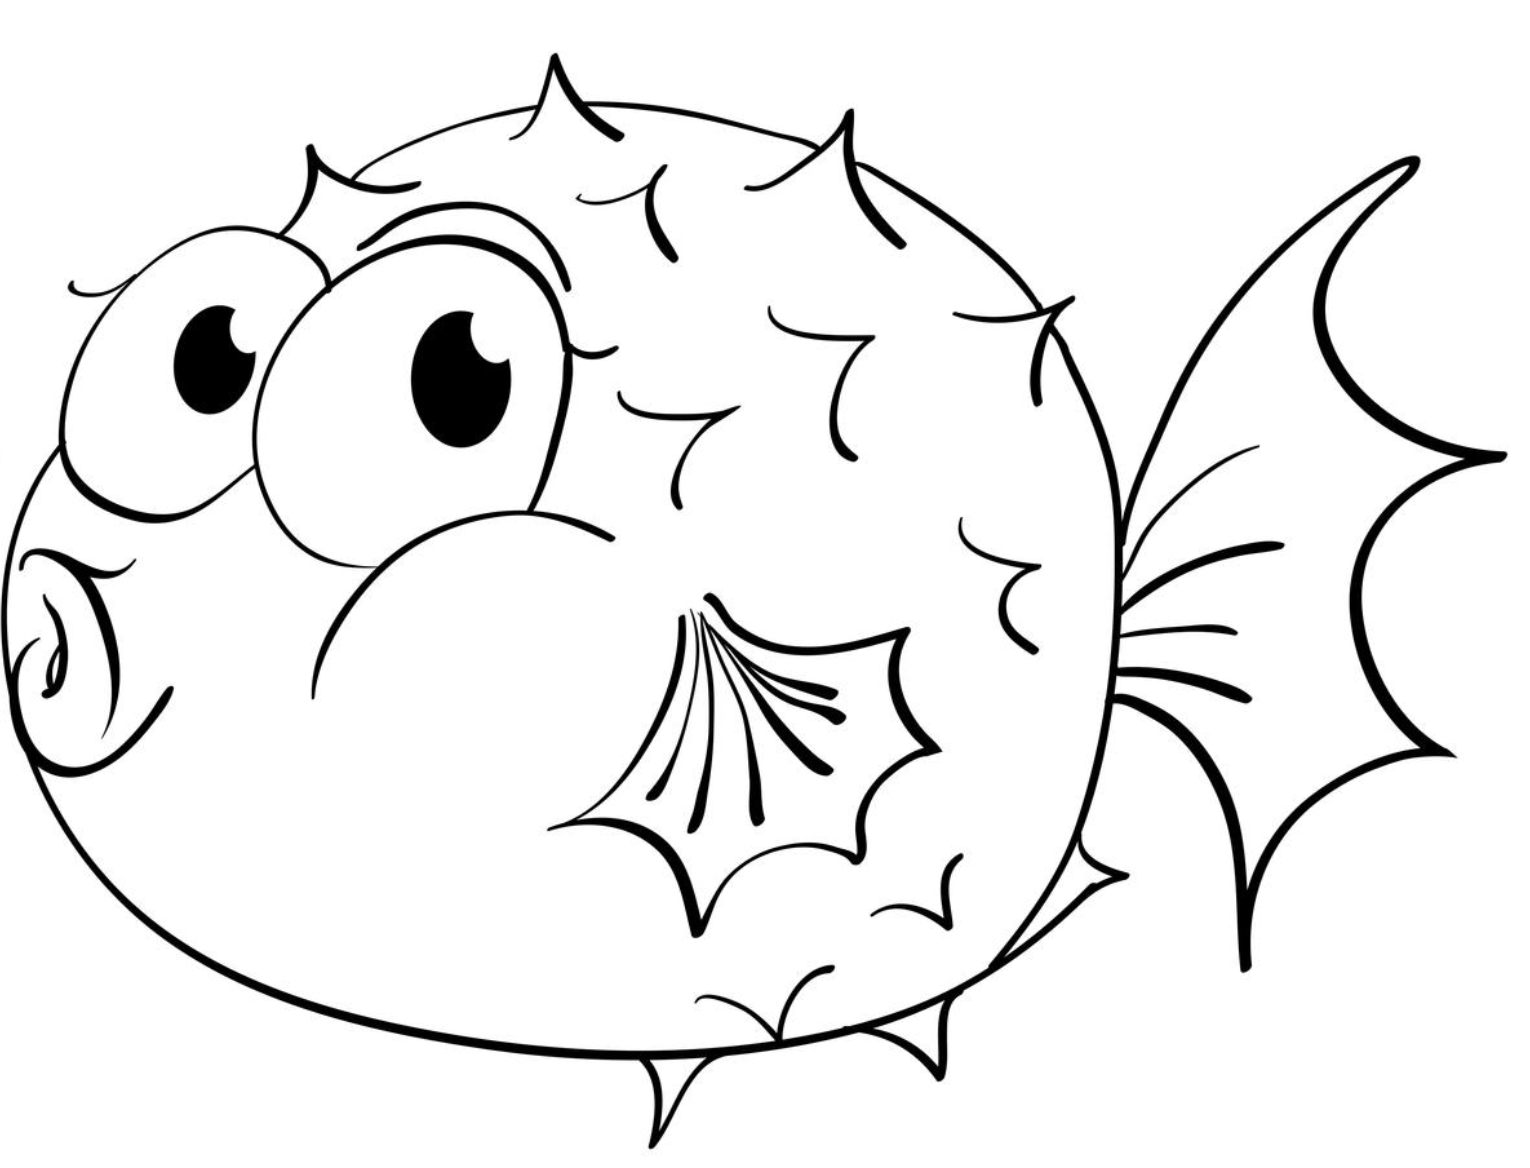

In [6]:
from PIL import Image

chosenAnimal = 'fish'

orininalImage = Image.open('../../../single-parameter-fit/resources/generatedAnimals/originalDoodle/%s.png' % chosenAnimal)
orininalImage

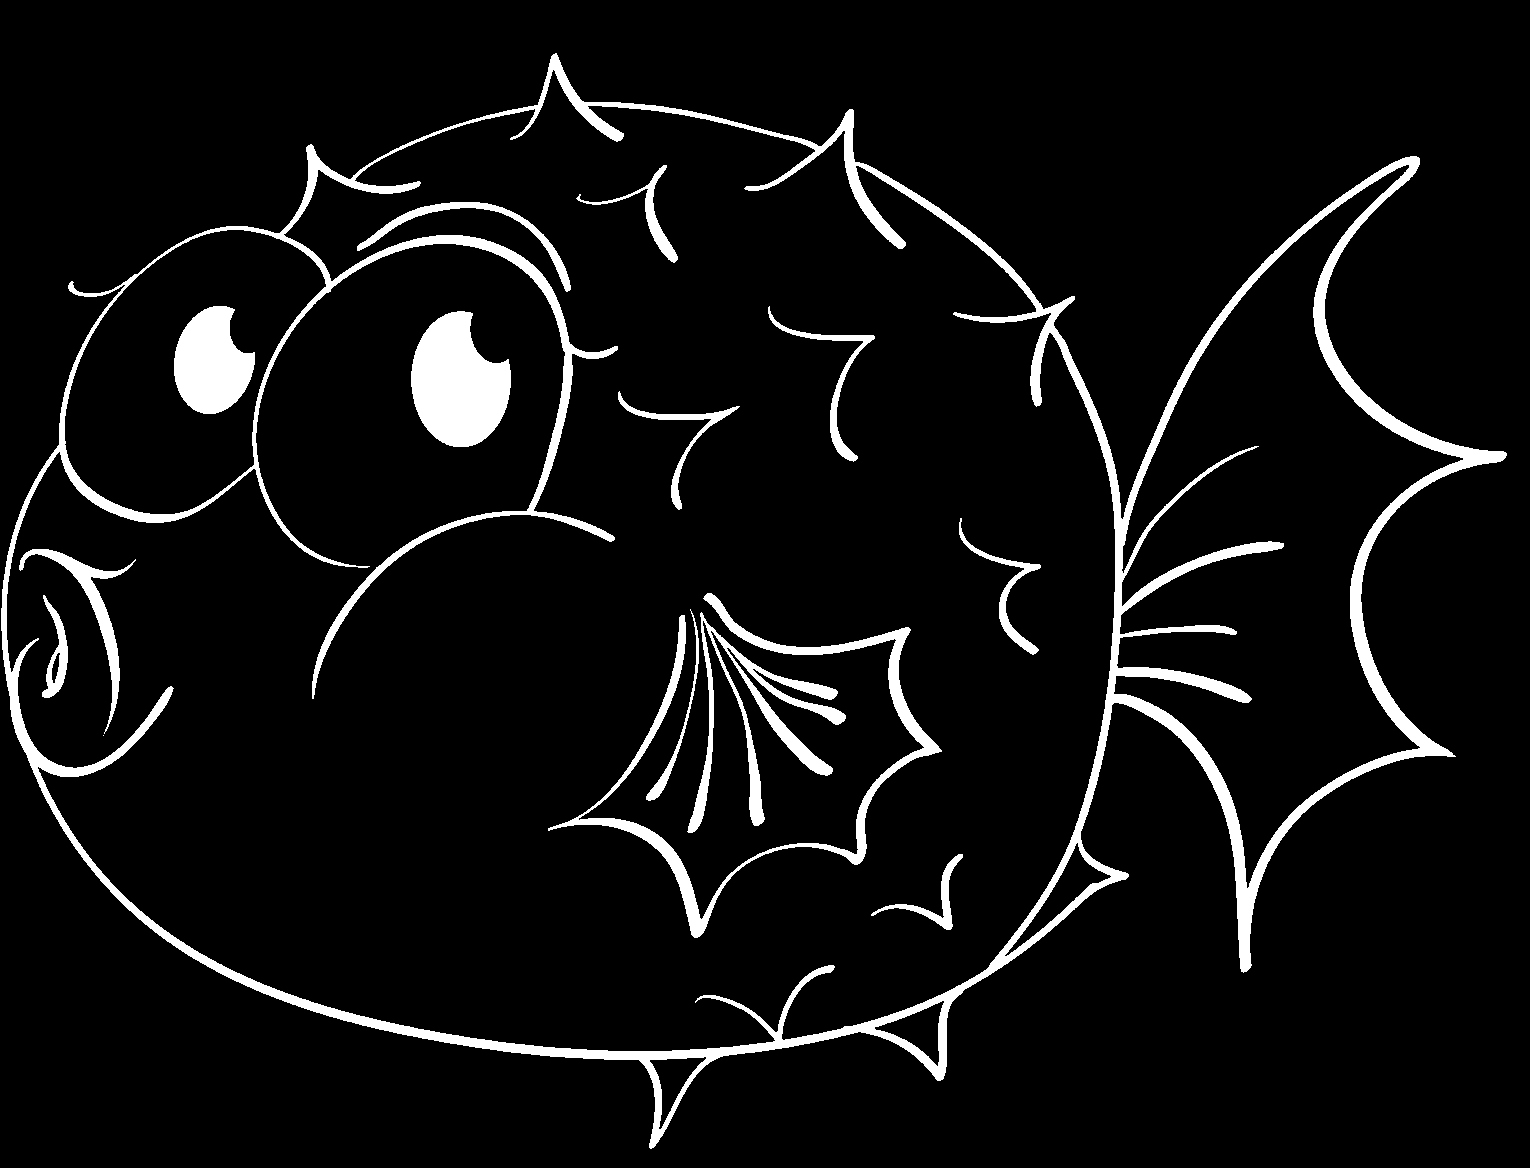

In [7]:
import numpy as np

image = orininalImage.convert('L').point(lambda x : 0 if x > 100 else 255).convert('1')

img = np.rot90(np.asarray(image), k=3)
width, height = img.shape
possiblePositions = list(zip(*np.where(img)))

image

/var/folders/f6/vzqh7ynx4n3ft_sx36yv3gbm0000gn/T/ipykernel_21228/1154750850.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = pd.DataFrame(possiblePositions, columns=['x', 'y']).groupby('x').apply(sampleAndScale)


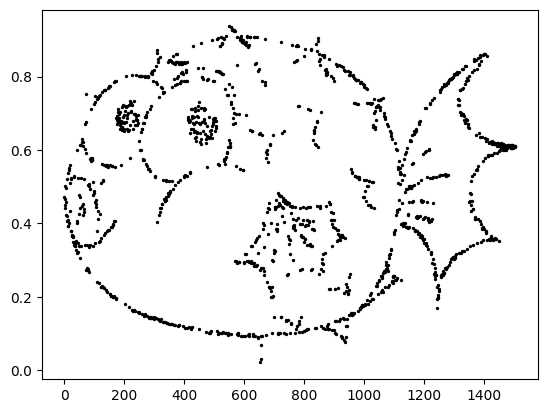

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

sampleAndScale = lambda gr: gr['y'].sample().values[0] / height

data = pd.DataFrame(possiblePositions, columns=['x', 'y']).groupby('x').apply(sampleAndScale)
data = data.reindex(np.arange(0, width), fill_value=-10)

data = data[data > 0]
numbPoints = len(data)
data.index = range(numbPoints)

plt.scatter(range(numbPoints), data, color='k', s=2)

In [10]:
decimalInitial = findInitialCondition(data)

significance = 18072 bits ; 5439 digits (base-10) ; ratio = 3.323



Process SpawnPoolWorker-1:
Process SpawnPoolWorker-3:
Process SpawnPoolWorker-2:
Process SpawnPoolWorker-5:
Process SpawnPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/eitanturok/.local/share/uv/python/cpython-3.11.9-macos-aarch64-none/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/eitanturok/.local/share/uv/python/cpython-3.11.9-macos-aarch64-none/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/eitanturok/.local/share/uv/python/cpython-3.11.9-macos-aarch64-none/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/Users/eitanturok/.local/share/uv/python/cpython-3.11.9-macos-aarch64-none/lib/python3.11/multiprocessing/queues.py", line 367, in get
    return _F

KeyboardInterrupt: 